In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [563]:
df_week = pd.read_csv("SAP_weekly_return_volatility.csv")
df_daily = pd.read_csv("SAP_weekly_return_volatility_detailed.csv")

In [564]:
df_week.head(5)

,Year,Week_Number,mean_return,volatility,label
0,2019,0,-0.1050,3.594650,0
1,2019,1,0.6532,1.153409,1
2,2019,2,0.7326,1.198802,1
3,2019,3,0.0735,1.593999,0
4,2019,4,-0.3746,2.056743,0


In [565]:
df_daily.head(5)

,High,Low,Open,Close,Volume,Adj Close,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility
0,99.559998,98.339996,98.570000,99.180000,506300.0,94.896118,0.000,2019-01-02,0,2019,2,Wednesday,-0.1050,3.594650
1,96.830002,95.449997,96.730003,95.459999,807800.0,91.336800,-3.751,2019-01-03,0,2019,3,Thursday,-0.1050,3.594650
2,99.199997,96.910004,97.339996,98.739998,1038100.0,94.475128,3.436,2019-01-04,0,2019,4,Friday,-0.1050,3.594650
3,100.190002,98.760002,99.440002,99.709999,861600.0,95.403229,0.982,2019-01-07,1,2019,7,Monday,0.6532,1.153409
4,101.480003,100.430000,101.370003,101.269997,548600.0,96.895844,1.565,2019-01-08,1,2019,8,Tuesday,0.6532,1.153409


In [566]:
df_week_copy = df_week.copy()
week_ret = list()
for i in range(len(df_week)):
    y = df_week["Year"][i]
    w = df_week["Week_Number"][i]
    week_ret.append(np.array(df_daily["Adj Close"][(df_daily["Year"] == y) & (df_daily["Week_Number"] == w)])[-1])
    
df_week_copy["week_fri_ret"] = week_ret
df_week_copy.head(5)

,Year,Week_Number,mean_return,volatility,label,week_fri_ret
0,2019,0,-0.1050,3.594650,0,94.475128
1,2019,1,0.6532,1.153409,1,97.575188
2,2019,2,0.7326,1.198802,1,101.172775
3,2019,3,0.0735,1.593999,0,101.431114
4,2019,4,-0.3746,2.056743,0,99.460091


### 1. take weekly data for year 1. For each W = 5; 6; : : : ; 12 and for each d = 1; 2; 3 construct the corresponding polynomials Use these polynomials to predict weekly labels. Plot the accuracy - on x axis you have W and you plot three curves for accuracy (separate curve for each d).

In [567]:
df_week_2019 = df_week_copy[df_week_copy["Year"] == 2019]
df_week_2020 = df_week_copy[df_week_copy["Year"] == 2020].reset_index(drop=True)

In [568]:
def poly(x, y, deg, y_p):
    
    weights = np.polyfit(x, y, deg)
    model = np.poly1d(weights)
    predicted = model(y_p)
       
    return predicted

In [578]:
d1_w_dict = dict()
d2_w_dict = dict()
d3_w_dict = dict()
true_l = df_week_2019["label"].values

for d in range(1,4):
    for w in range(5,13):
        ret1 = list(df_week_2019["label"][:w])
        for i in range(len(df_week_2019) - w):
            x1 = np.array(df_week_2019["Week_Number"][i:i + w])
            y1 = np.array(df_week_2019["week_fri_ret"][i:i + w])
            y_p1 = np.array(df_week_2019["Week_Number"][i + w])
            ret = poly(x1, y1, d, y_p1)
            ret1.append(1 if ret > df_week_2019["week_fri_ret"][i + w] else 0)
        
        if d == 1:
            d1_w_dict[w] = np.mean(np.array(true_l) == np.array(ret1))
            
        if d == 2:
            d2_w_dict[w] = np.mean(np.array(true_l) == np.array(ret1))
            
        if d == 3:
            d3_w_dict[w] = np.mean(np.array(true_l) == np.array(ret1))

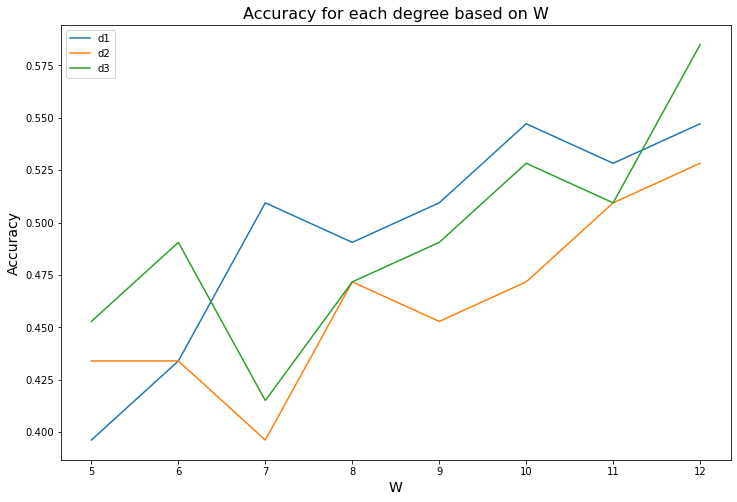

In [570]:
df_acc_2019 = pd.DataFrame([d1_w_dict.keys(),d1_w_dict.values(),d2_w_dict.values(),d3_w_dict.values()], \
                           index=["columns","d1","d2","d3"]).T

df_acc_2019.plot(x="columns", y=["d1","d2","d3"], figsize=(12,8), use_index = True)
plt.xlabel("W",fontsize = 14)
plt.ylabel("Accuracy",fontsize = 14)
plt.title("Accuracy for each degree based on W",fontsize = 16)
plt.show()

### 2. for each d take the best W that gives you the highest accuracy. Use this W to predict labels for year 2. What is your accuracy?

* For d1 will take w10
* For d2 will take w12
* For d3 will take w12

In [571]:
acc_2020 = dict()
d1_cm_2020 = dict()
d2_cm_2020 = dict()
d3_cm_2020 = dict()
true_l_2020 = df_week_2020["label"].values
deg = 0

for w in [10,12,12]:
    deg = deg + 1
    ret1_20 = ret1 = list(df_week_2020["label"][:w])
    for i in range(len(df_week_2020) - w):
        x1_20 = np.array(df_week_2020["Week_Number"][i:i + w])
        y1_20 = np.array(df_week_2020["week_fri_ret"][i:i + w])
        y_p1_20 = np.array(df_week_2020["Week_Number"][i + w])
        ret_20 = poly(x1_20, y1_20, deg, y_p1_20)
        ret1_20.append(1 if ret_20 > df_week_2020["week_fri_ret"][i + w] else 0)

    if deg == 1:
        d1_cm_2020 = confusion_matrix(np.array(true_l_2020), np.array(ret1_20))
        acc_2020[deg] = np.mean(np.array(true_l_2020) == np.array(ret1_20))
        df_week_2020[deg] = ret1_20

    if deg == 2:
        d2_cm_2020 = confusion_matrix(np.array(true_l_2020), np.array(ret1_20))
        acc_2020[deg] = np.mean(np.array(true_l_2020) == np.array(ret1_20))
        df_week_2020[deg] = ret1_20

    if deg == 3:
        d3_cm_2020 = confusion_matrix(np.array(true_l_2020), np.array(ret1_20))
        acc_2020[deg] = np.mean(np.array(true_l_2020) == np.array(ret1_20))
        df_week_2020[deg] = ret1_20

In [572]:
print(f"""
Accuracy for Best W for each d for Year 2020:

Deg 1 W 10 Accuracy = {acc_2020[1]:.2f}
Deg 2 W 12 Accuracy = {acc_2020[2]:.2f}
Deg 3 W 12 Accuracy = {acc_2020[3]:.2f}
""")


Accuracy for Best W for each d for Year 2020:

Deg 1 W 10 Accuracy = 0.53
Deg 2 W 12 Accuracy = 0.45
Deg 3 W 12 Accuracy = 0.51



### 3. compute confusion matrices (for each d) for year 2

In [573]:
d1_cm = d1_cm_2020.ravel()
d2_cm = d2_cm_2020.ravel()
d3_cm = d3_cm_2020.ravel()
df_cm_2020 = pd.DataFrame([d1_cm,d2_cm,d3_cm], columns = ["TN","FP","FN","TP"], index = ["d1","d2","d3"]).T
df_cm_2020

,d1,d2,d3
TN,19,16,17
FP,14,17,16
FN,11,12,10
TP,9,8,10


### 4. implement three trading strategies for year 2 (for each d using the "best" values for W from year 1 that you have computed)

In [574]:
def compute_daily_ret(d_frame1, amt):
    ret = round(((d_frame1["Return"] / 100) + 1).cumprod() * amt,2)

    return round(ret.values[-1],2)

In [575]:
def weekDaily(d_frame_week,d_frame_daily,lbl):
    total_ret = list()
    for i in range(len(d_frame_week)):
        if i > 0:
            year = d_frame_week.loc[i]["Year"]

            week = d_frame_week.loc[i]["Week_Number"]

            prv_week = d_frame_week.loc[i - 1]["Week_Number"]

            frame = d_frame_daily[(d_frame_daily["Week_Number"] == week)]

            if d_frame_week.loc[i - 1][lbl] == 0 and d_frame_week.loc[i][lbl] == 1:

                amount = total_ret[i - 1] 
                total_ret.append(compute_daily_ret(frame, amount))
                
            elif d_frame_week.loc[i - 1][lbl] == 1 and d_frame_week.loc[i][lbl] == 1:

                amount = total_ret[i - 1]
                total_ret.append(compute_daily_ret(frame, amount))
            else:
                total_ret.append(total_ret[i - 1])
        else:     
            total_ret.append(100)
    return total_ret

In [576]:
daily_ret = list()
for i in range(1,4):
    daily_ret.append(weekDaily(df_week_2020,\
                      df_daily[(df_daily["Year"] == 2020)].reset_index(drop=True),i))
    final_ret = daily_ret[i -1][-1]

    print(f"Total return for $ 100 using the prediction for 2020 based on deg{i} and its best w $ {final_ret} ")

Total return for $ 100 using the prediction for 2020 based on deg1 and its best w $ 62.56 
Total return for $ 100 using the prediction for 2020 based on deg2 and its best w $ 78.19 
Total return for $ 100 using the prediction for 2020 based on deg3 and its best w $ 70.86 


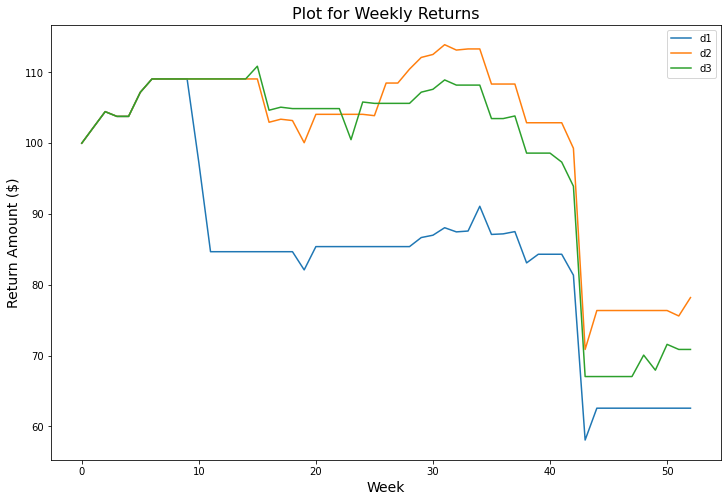

In [577]:
df_daily_2020 = pd.DataFrame([daily_ret[0],daily_ret[1],daily_ret[2]], index=["d1","d2","d3"]).T

df_daily_2020.plot(y=["d1","d2","d3"], figsize=(12,8), use_index = True)
plt.xlabel("Week",fontsize = 14)
plt.ylabel("Return Amount ($)",fontsize = 14)
plt.title("Plot for Weekly Returns",fontsize = 16)
plt.show()